In [1]:
#find the relevant descriptions of the pfam domains
import urllib.request
import shutil

url1 = 'http://current.geneontology.org/ontology/external2go/pfam2go'
page = urllib.request.urlopen(url1)
print(page)
f = open("./test2.html", "wb")
shutil.copyfileobj(page, f)
f.close()

In [2]:
import pandas as pd
pfam_func=pd.read_csv("pfam_go.txt",sep='delimiter',header=None)
pfam_func[['domain','go']] = pfam_func[0].str.split(">", 1, expand=True)
pfam_func=pfam_func.drop(columns=[0])


/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
#split further and keep the names
pfam_func[['code','name']]=pfam_func['domain'].str.split(" ",1,expand=True)
pfam_func[['go name','go code']]=pfam_func['go'].str.split(";",1,expand=True)

pfam_func=pfam_func.drop(columns=['domain','go','code','go code'])
pfam_func

,name,go name
0,7tm_1,GO:G protein-coupled receptor activity
1,7tm_1,GO:G protein-coupled receptor signaling pathway
2,7tm_1,GO:integral component of membrane
3,7tm_2,GO:G protein-coupled receptor activity
4,7tm_2,GO:G protein-coupled receptor signaling pathway
...,...,...
10257,Mtf2,GO:mitochondrion
10258,MELT,GO:cell division
10259,Spo16,GO:DNA secondary structure binding
10260,Spo16,GO:synaptonemal complex assembly


In [33]:
pfam_func=pfam_func.groupby(['name'])['go name'].apply(lambda x: ','.join(x)).reset_index()
#remove the spaces from 'name' column
pfam_func['name']=pfam_func['name'].str.strip()


In [57]:
pd.set_option('display.max_rows', 365)

In [ ]:
#the domains plus function from log2 analysis
import numpy as np
#apo poy 3efitrose to dom_log2
dom_go=dom_log2.join(pfam_func.set_index('name'), on='name')
#replace the NaN values with None
dom_go = dom_go.replace({np.nan: 'None'})
dom_go

In [81]:
#make a plot showing the go functions
dom_go=dom_go.set_index('name')['go name'].str.split('\s,\s*', expand=True).stack().reset_index(name='go name').drop('level_1',1)

In [82]:
#great! now make the plot for each go ontology and count the domains that are in it
dom_go['go name']=dom_go['go name'].str.strip()

In [127]:
dom_go['go name'].value_counts()[:30]

None                                                                          245
GO:DNA binding                                                                 23
GO:ATP binding                                                                 21
GO:DNA replication                                                             13
GO:DNA repair                                                                   6
GO:DNA recombination                                                            6
GO:oxidation-reduction process                                                  5
GO:regulation of transcription, DNA-templated                                   4
GO:viral capsid                                                                 4
GO:protein binding                                                              4
GO:nucleic acid binding                                                         4
GO:ATPase activity                                                              4
GO:catalytic act

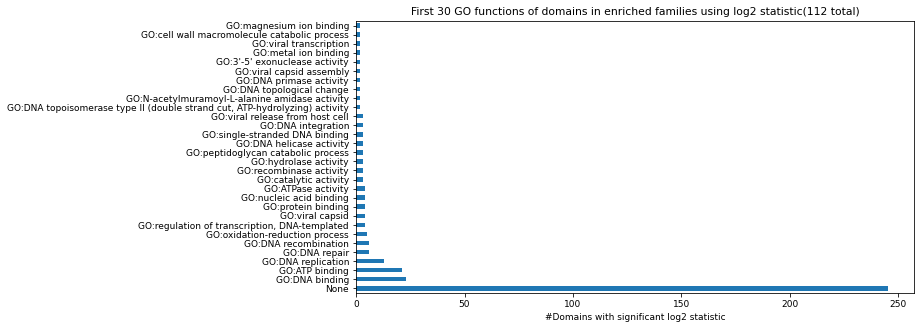

In [120]:
import matplotlib
import matplotlib.pyplot as plt
plt.gca().invert_yaxis()
matplotlib.rcParams.update({'font.size': 9})
plt.title("First 30 GO functions of domains in enriched families using log2 statistic(112 total)")
plt.xlabel("#Domains with significant log2 statistic")

fig=dom_go['go name'].value_counts()[:30].plot(kind='barh',figsize=(10,5))
plt.savefig('pfam_log2.jpg',bbox_inches='tight')

In [104]:
len(dom_go['go name'].value_counts().to_list())

112